<a href="https://colab.research.google.com/github/isaceballos51/Isabella-Ceballos/blob/master/Actividad1_IsabellaCeballos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B&C Informe Mercado Inmobiliario**

# *Isabella Ceballos Sánchez*


# **Introducción**

Actualmente, es conocido para las empresas al rededor del mundo que la toma de desiciones con información de valor es un pilar esencial para el crecimiento y éxito de las empresas a corto, mediano y largo plazo.

En este sentido, la estadística y sus modelos toman un papel relevante para proporcionar comprensión, gráficos y análisis a partir de datos para desiciones del negocio.

El presente informe del mercado inmobiliario de la ciudad de cali con información sacada de la empresa B&C (agencia de bienes raíces de la ciudad de cali) busca proporcionar gráficos e información relevante para la toma de desiciones del negocio en temas como el nicho de mercado, estrategia de marketing, precios de ventas y personalización de servicios para sus clientes.


Para este objetivo, inciaremos con un análisis estadístico y descriptivo de la base, se continuará con un procesamiento y limpieza de los datos, para poder así recomendar estrategias de marketing y recomendaciones para la toma de decisiones.




**1) Importar librerías y lectura de base de datos**

In [83]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

url="/vivienda_faltantes.csv"
data = pd.read_csv(url, header=None, na_values=" ?")
data.columns = ['ID', 'Zona', 'Piso', 'Estrato', 'Precio', 'Area_Cons', 'Parquea',
           'Baño', 'Habitacion', 'Tipo', 'Barrio', 'Longitud', 'Latitud']
data.drop([0], axis=0, inplace=True)

In [84]:
data

,ID,Zona,Piso,Estrato,Precio,Area_Cons,Parquea,Baño,Habitacion,Tipo,Barrio,Longitud,Latitud
1,8312,Zona Oeste,4,6,1300,318,2,4,2,Apartamento,arboleda,-76576,3454
2,8311,Zona Oeste,1,6,480,300,1,4,4,Casa,normandía,-76571,3454
3,8307,Zona Oeste,NaN,5,1200,800,4,7,5,Casa,miraflores,-76568,3455
4,8296,Zona Sur,2,3,220,150,1,2,4,Casa,el guabal,-76565,3417
5,8297,Zona Oeste,NaN,5,330,112,2,4,3,Casa,bella suiza alta,-76565,3408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8326,8314,Zona Oeste,7,6,1400,210,3,4,3,Apartamento,normandía,-76.57941,3.45531
8327,8315,Zona Oeste,NaN,6,620,167,2,4,4,Apartamento,normandía,-76.5853,3.45971
8328,8316,Zona Norte,7,5,400,220,1,4,4,Apartamento,granada,-76.58732,3.46148
8329,8317,Zona Oeste,NaN,6,1100,290,4,4,3,Apartamento,normandía,-76.58744,3.46124


De la base, se deduce que contamos con 8330 registros y 13 atributos.

In [85]:
data.dtypes

ID            object
Zona          object
Piso          object
Estrato       object
Precio        object
Area_Cons     object
Parquea       object
Baño          object
Habitacion    object
Tipo          object
Barrio        object
Longitud      object
Latitud       object
dtype: object

Como podemos analizar, el código nos arroja que todos los 13 atributos con los que contamos son tipo **categóricos**, pero al haber visualizado previamente la data, conocemos que sólo los atributos **Zona, barrio y tipo** deberían de considerarse **categóricos**.


Este fenómeno se presenta por los datos NaN que dichos atributos numéricos presentan.

**2) Validar datos NaN o Nulls**

2.1 Cantidad de Null o NaN por atributos

In [86]:
data.isnull().sum()

ID               3
Zona             3
Piso          2641
Estrato          3
Precio           2
Area_Cons        3
Parquea       1606
Baño             3
Habitacion       3
Tipo             3
Barrio           3
Longitud         3
Latitud          3
dtype: int64

In [87]:
(data.isnull().sum()/len(data))*100

ID             0.036014
Zona           0.036014
Piso          31.704682
Estrato        0.036014
Precio         0.024010
Area_Cons      0.036014
Parquea       19.279712
Baño           0.036014
Habitacion     0.036014
Tipo           0.036014
Barrio         0.036014
Longitud       0.036014
Latitud        0.036014
dtype: float64

Como se logra ver, los atributos que más datos faltantes presentan son **Piso y Parqueadero**, con un porcentaje deñ 31 % y 19 % respectivamente.

Pero antes de tomar la decisión de eliminar el atributo, debe de evaluarse la importancia del tipo de información que brinda y cómo esta influye en el precio de venta de la vivienda.

En el caso de piso, si es un **apartamento** es de gran influencia, dado que entre más alto el piso, mejor es la visión panorámica del paisaje que se le ofrece al comprador, del mismo modo, si es una **casa** al tener más pisos, eso implica una mayor área de construcción, haciendo que su valor incremente significativamente.

Por otro lado, con respecto a los parqueaderos también se presenta este fenómeno, es decir, se espera que al brindar una vivienda con gran disponibilidad de parqueaderos, su valor incremente ya que también tiene mayor área de disposición.

Por tal razón, por ahora no se optará a eliminar estos atributos, si no a proceder a evaluar la cantidad de nulos por registros.

2.2 Cantidad Null o NaN por registros

In [88]:
print('Cantidad máxima faltante por registros:',max(data.isnull().sum(axis=1)))

Cantidad máxima faltante por registros: 13


Este es una gran alerta, debido a que significa que contamos con registros donde en su totalidad sus valores son NaN. Lo que quiere decir que se puede considerar un dato tipo **basura**

A partir de la cantidad de Nulos por atributos, se deduce que estos registros que presentan NaN en su totalidad son **3**.

In [89]:
faltantes = data [(data.ID.isnull()) ]
print(faltantes)

       ID Zona Piso Estrato Precio Area_Cons Parquea Baño Habitacion Tipo  \
8320  NaN  NaN  NaN     NaN    NaN       NaN     NaN  NaN        NaN  NaN   
8321  NaN  NaN  NaN     NaN    NaN       NaN     NaN  NaN        NaN  NaN   
8322  NaN  NaN  NaN     NaN    330       NaN     NaN  NaN        NaN  NaN   

     Barrio Longitud Latitud  
8320    NaN      NaN     NaN  
8321    NaN      NaN     NaN  
8322    NaN      NaN     NaN  


Al ser 3 registros completamente nulos, se procederá a eliminarlos.

In [90]:
data.drop([8320,8321,8322], axis=0, inplace=True)

In [91]:
print(' Cantidad de registros con datos faltantes :',len(data[data.isnull().any(1)]))
print('Porcentaje',round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')

 Cantidad de registros con datos faltantes : 3515
Porcentaje 42.21 %


<ipython-input-91-b240efb821a4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(' Cantidad de registros con datos faltantes :',len(data[data.isnull().any(1)]))
<ipython-input-91-b240efb821a4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Porcentaje',round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')


Al ejecutar la cantidad de registros que presentan información faltante, obtenemos que más del 40% de la data tiene al menos un atributo en NaN, ya sea **Piso o parqueadero, o incluso ambos**.

Entonces, como se concluyó que ambos atributos generan valor en cuanto al precio de la vivienda. Procederemos a modificar ese valor Nan que presentamos.

Cuando uno desea hacer una modificación, lo más común es llenarlo con la media del atributo, o con ceros. En este caso, no tiene coherencia que el piso tenga un valor de cero, pero por el otro lado, es posible que una vivienda no cuente con parqueadero.


In [93]:
data = data.fillna('')

numericos = ['ID', 'Piso', 'Estrato', 'Precio', 'Area_Cons', 'Parquea',
           'Baño', 'Habitacion', 'Longitud', 'Latitud']

for i in numericos:
  data[i] = pd.to_numeric(data[i], errors='coerce').fillna(0).apply(np.int64)

In [114]:
data['Piso'] = data['Piso'].replace(0,data['Piso'].mean())
data['Parquea'] = data['Parquea'].replace(0,data['Parquea'].mean())

In [115]:
data.dtypes

ID              int64
Zona           object
Piso          float64
Estrato         int64
Precio          int64
Area_Cons       int64
Parquea       float64
Baño            int64
Habitacion      int64
Tipo           object
Barrio         object
Longitud        int64
Latitud         int64
dtype: object

De aquí, se puede concluir que ningún atributo tiene relación con otro, por ende, no se puede borrar algún atributo

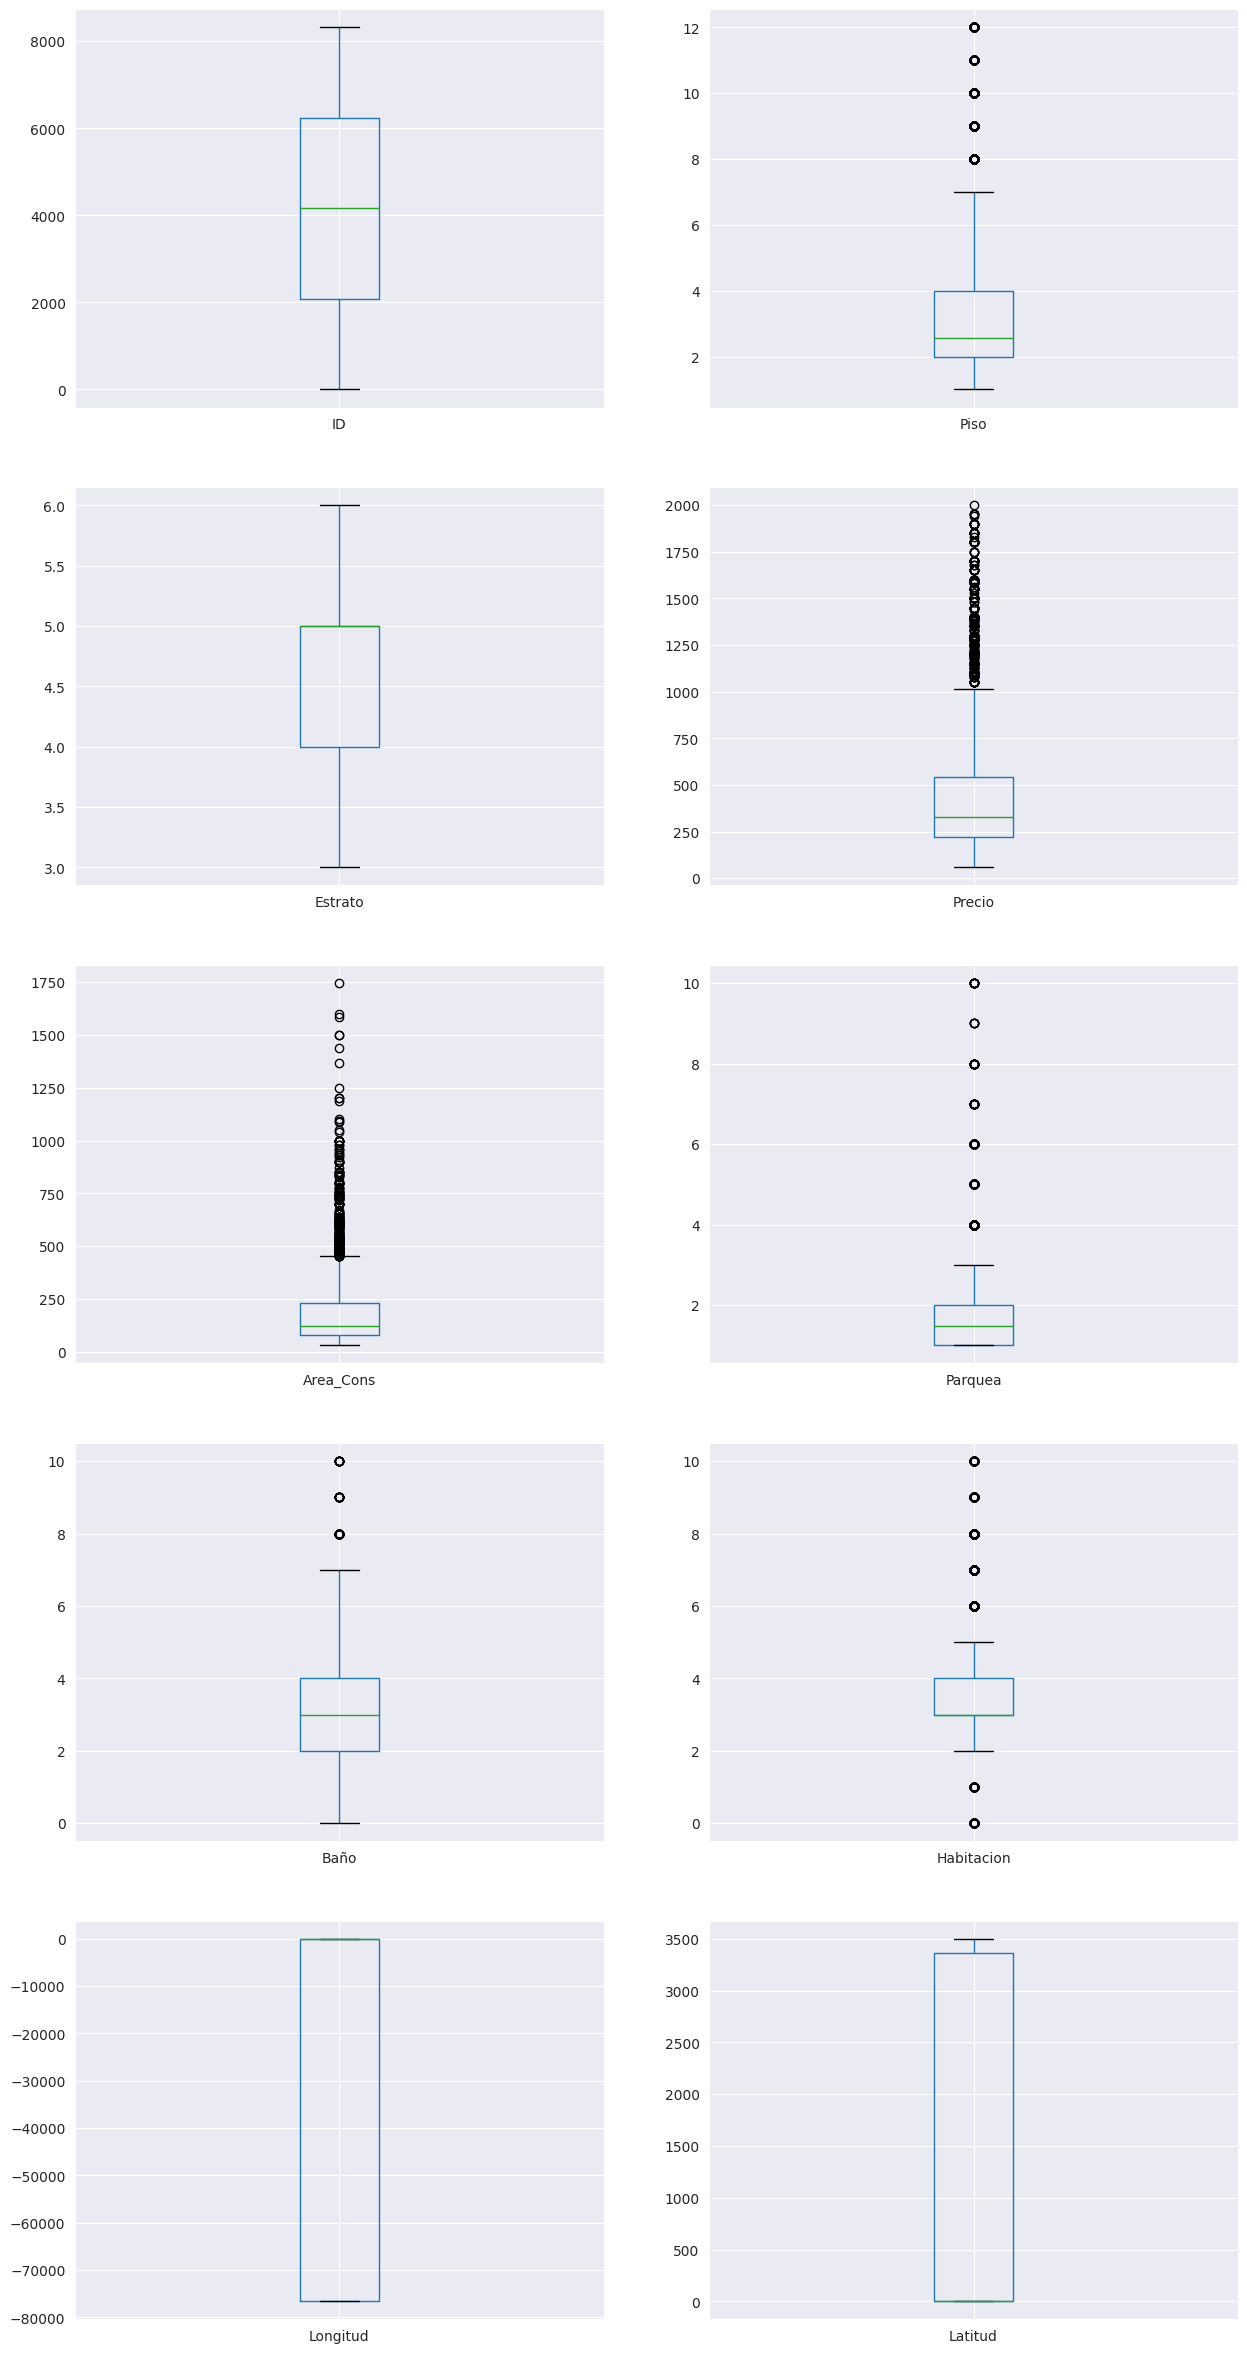

In [116]:
#Diagrama de cajas y bigotes para atributos numéricos
fig, axes = plt.subplots(5,2,figsize=(15,30))
y = 0

for i in numericos:
    a = data.boxplot(i,ax=axes.flatten()[y])
    y += 1
plt.show()

De estos diagramas de cajas, se puede apreciar que la mayoría de atributos tienen presentan una gran dispersión en sus datos, más esto no quiere decir que se puedan considerar datos atípicos. Ya que eso depende de la naturaleza del atributo y del tipo de valor que nos encontramos analizando.

**3) Analizar variables categóricas**

In [94]:
data.Tipo.value_counts()

Apartamento    5032
Casa           3195
APARTAMENTO      61
casa             14
apto             13
CASA             12
Name: Tipo, dtype: int64

De aquí podemos deducir que la misma información se encuentra representada en diferentes formas de escritura.


In [95]:
data["Tipo"]=data["Tipo"].apply(lambda x: str(x).replace('APARTAMENTO','Apartamento'))
data["Tipo"]=data["Tipo"].apply(lambda x: str(x).replace('CASA','Casa'))
data["Tipo"]=data["Tipo"].apply(lambda x: str(x).replace('apto','Apartamento'))
data["Tipo"]=data["Tipo"].apply(lambda x: str(x).replace('casa','Casa'))

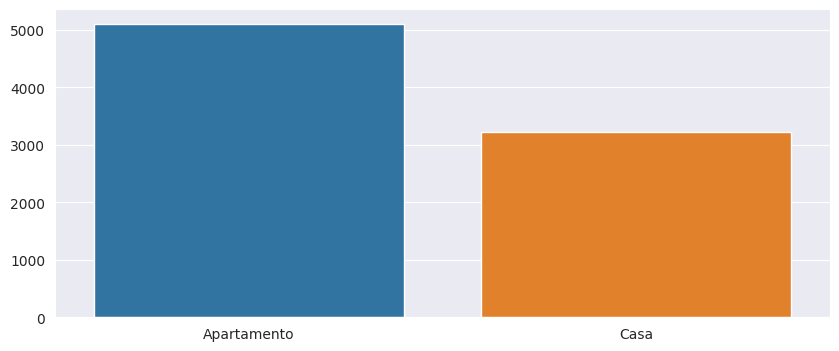

In [96]:
tipo = data.Tipo.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=tipo.index, y=tipo.values)
plt.show()

In [100]:
data.Tipo.value_counts()/len(data) *100

Apartamento    61.318602
Casa           38.681398
Name: Tipo, dtype: float64

En este caso, se puede recomendar que en el mercado hay un gran potencial de ventas enfocadas a viviendas tipo **apartamento**.

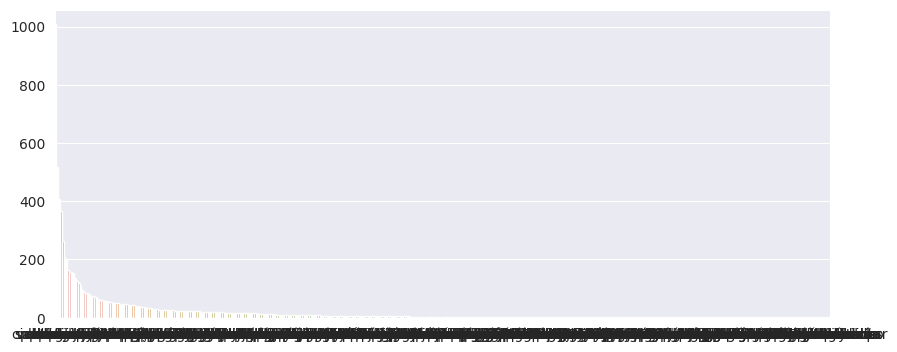

In [104]:
Barrio = data.Barrio.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Barrio.index, y=Barrio.values)
plt.show()

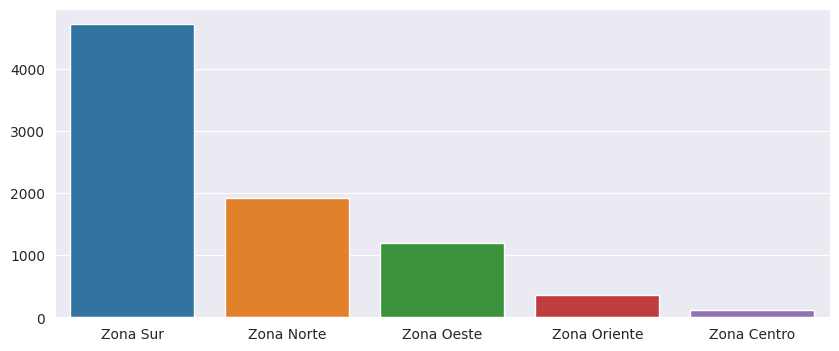

In [105]:
Zona = data.Zona.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Zona.index, y=Zona.values)
plt.show()

In [106]:
data.Zona.value_counts()/len(data) *100

Zona Sur        56.755134
Zona Norte      23.081542
Zona Oeste      14.458989
Zona Oriente     4.215204
Zona Centro      1.489132
Name: Zona, dtype: float64

De esta gráfica, se deduce que más de la mitad de las ventas o viviendas son ubicadas en la **zona sur** de Cali, lo que puede implicar que es una zona con gran oferta de venta de viviendas. En este caso, ya tocaría a analizar en profundidad si los motivos de que en esta zona hayn tantas viviendas a la venta, es por un motivo positivo o negativo.

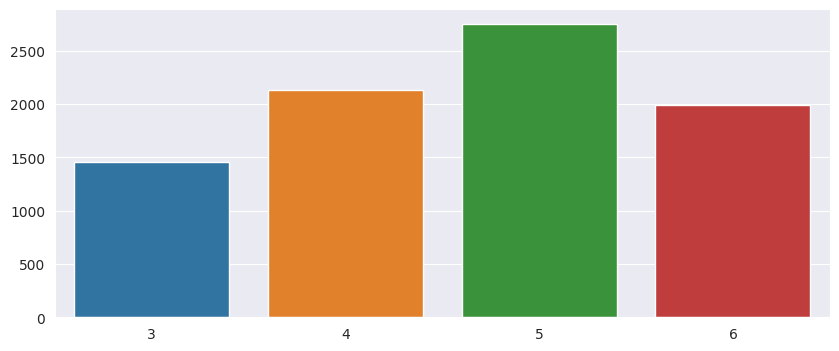

In [117]:
Estrato = data.Estrato.value_counts()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Estrato.index, y=Estrato.values)
plt.show()

#**Modelos de Aprendizaje**

Recomendaría el desarrollo e implementación de 2 modelos:

- El primero sería para realizar un clustering, donde a partir de los atributos más significativos, se obtenga un conjunto de conglomerados.

- El segundo, sería interesante adaptar la tabla a tener el atributo precio como una etiqueta, para implementar un modelo supervisado que permita predecir en qué categoría o categorías pertenecerá la vivienda, para ellos conocer a qué precio pueden estimar su venta.


# **Conclusión**

A la empresa B&C, le recomendaría enfocarse en las zonas, sobre todo aquellas vivienda tipo apartamento.

- Por otro lado, como promedio se adquieren viviendas con 3 habitaciones y en la zona del Sur de la ciudad.

- Si se desean adquirir